## Events Analysis

This notebook looks at changes around major U.S. events: 9/11, the 2008 Financial Crisis, and the 2016 election.

### Import packages and load data

In [8]:
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import nltk
import seaborn as sns

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

from ast import literal_eval
import source.helper_functions as helper


In [ ]:
# load corpus
file = '../tal-scrape/total_trans_normalized.csv'
tal_df_all = pd.read_csv(file, converters = helper.converters)

In [9]:
# load 1998 to 2003 dataframe
# it has POS_sents saved to it because that takes awhile to run and is used in most common adjectives
tal_df = pd.read_csv('trans_total_pos_98-03.csv', converters = {'tokenized_sents': literal_eval,'no_lemma_normalized_sents': literal_eval,
                'normalized_sents':literal_eval,'tokenized_text':literal_eval,
                'normalized_tokens':literal_eval,'no_lemma_normalized_tokens':literal_eval, 'POS_sents': literal_eval})

## Event 1: 9/11

Words of interest:

In [10]:
# words of interest for this event
word1 = ['iraq', 'iraqi', 'iraqis', 'afghanistan', 'qaeda', 'weapon', 'weapons', 'muslim', 'muslims', 
         'terrorist', 'terrorism', 'terror', 'panic', 'war', 'hate', 'soldier', 'soldiers', 
         'ally', 'allies', 'security', 'secure','islam']
word2 = ['love', 'america', 'american', 'country', 'safe', 'family', 'home','hate']

## Split text into periods

In [11]:
# prep text
df98 = tal_df[tal_df.year==1998]
df99 = tal_df[tal_df.year==1999]
df00 = tal_df[tal_df.year==2000]
df01 = tal_df[tal_df.year==2001]
df02 = tal_df[tal_df.year==2002]
df03 = tal_df[tal_df.year==2003]

In [12]:
grouped = tal_df[(tal_df.year==1998) | (tal_df.year==1999) | (tal_df.year==2000)]

In [13]:
grouped2 = tal_df[(tal_df.year==2001) | (tal_df.year==2002) | (tal_df.year==2003)]

## Subject/object for verbs

In [7]:
# for 1998-2000 - takes awhile to run
x = helper.make_verb_dict('hate', grouped)
x

{'1998': (['they',
   'people',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'people',
   'she',
   'I',
   'I',
   'they',
   'We',
   'I',
   'I',
   'I',
   'I',
   'I',
   'you',
   'I',
   'I',
   'I',
   'I',
   'I'],
  ['What',
   'past',
   'room',
   'guts',
   'brothers',
   'him',
   'tits',
   'word',
   'Carrey',
   'him',
   'falls',
   'them',
   'place',
   'life',
   'column',
   'you',
   'you',
   'you',
   'you',
   'Timberlands']),
 '1999': (['you', 'I', 'they', 'you', 'I'], ['act', 'him']),
 '2000': (['They',
   'I',
   'brother',
   'I',
   'brother',
   'I',
   'I',
   'I',
   'who',
   'everyone',
   'They',
   'she',
   'they',
   'I',
   'I',
   'I',
   'I',
   'who',
   'I',
   'I',
   'I',
   'me'],
  ['you',
   'brother',
   'myself',
   'brother',
   'myself',
   'it',
   'club',
   'me',
   'you?I',
   'Bradley',
   'you',
   'people',
   'them',
   'them',
   'guts',
   'him',
   'him',
   'couple',
   'them',
   't

In [10]:
# 2001-2003 - takes awhile to run
z=helper.make_verb_dict('hate', grouped2)

In [16]:
z

{'2001': (['you',
   'I',
   'I',
   'he',
   'who',
   'we',
   'I',
   'I',
   'I',
   'I',
   'people',
   'people',
   'I',
   'you',
   'I',
   'I',
   'You',
   'I',
   'people',
   'I'],
  ['person',
   'him',
   'music',
   'it',
   'for--',
   'facts',
   'States',
   'olives',
   'them',
   'us',
   'it']),
 '2002': (['I',
   'who',
   'people',
   'I',
   'I',
   'I',
   'you',
   'we',
   'I',
   'physicists',
   'it',
   'I',
   'you',
   'I',
   'I',
   'I',
   'they',
   'you',
   'I',
   'people',
   'I',
   'you',
   'you',
   'He',
   'him',
   'you',
   'you',
   'you',
   'I',
   'I',
   'I',
   'I',
   'Americans',
   'Arabs'],
  ['you',
   'you',
   'you',
   'you',
   'torpedoes',
   'parents',
   'it',
   'pepper',
   'What',
   'fact',
   'it',
   'us',
   'Jews',
   'them',
   'people',
   'you',
   'men',
   'them',
   'it',
   'it',
   'it',
   'What',
   'house',
   'yourself',
   'it',
   'it',
   'way',
   'everything',
   'Islam',
   'him',
   'him']),
 

In [14]:
helper.make_verb_dict('love', grouped)

{'1998': (['I',
   'I',
   'I',
   'I',
   'they',
   'I',
   'we',
   'you',
   'I',
   'I',
   'I',
   'I',
   'We',
   'I',
   'I',
   'you',
   'Love',
   'he',
   'you',
   'who',
   'you',
   'I',
   'I',
   'you',
   'you',
   'you',
   'you',
   'she',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'who',
   'I',
   'I',
   'I',
   'I',
   'hen',
   'we',
   'I',
   'I',
   'they',
   'I',
   'I',
   'I',
   'she',
   'I',
   'I',
   'I',
   'I',
   'agreement.[LAUGHTER]I',
   'I',
   'I',
   'I',
   'I',
   'We',
   'We',
   'I',
   'you',
   'I',
   'I',
   'I',
   'we',
   'I',
   'Carpenter',
   'I',
   'I',
   'People',
   'you',
   'you',
   'I',
   'Terry',
   'he',
   'people',
   'I',
   'I',
   'I',
   'we',
   'we',
   'he',
   'I',
   'She',
   'She'],
  ['you',
   'you',
   'you',
   'you',
   'topic',
   'music',
   'her',
   'you',
   'you',
   'you',
   'brothers',
   'brothers',
   'one',
   'you',
   'her',
   'what',
   'Love',
   'stories',
   'her',
   

In [15]:
helper.make_verb_dict('love', grouped2)

{'2001': (['I',
   'I',
   'I',
   'I',
   'I',
   'who',
   'who',
   'I',
   'you',
   'I',
   'we',
   'you',
   'who',
   'mother',
   'He',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'I',
   'We',
   'I',
   'I',
   'I',
   'Keith',
   'you',
   'We',
   'We',
   'I',
   'I',
   'I',
   'Keith',
   'you',
   'We',
   'I',
   'I',
   'I',
   'they',
   'They',
   'I',
   'I',
   'you',
   'I',
   'Jen',
   'you',
   'you',
   'they',
   'I',
   'I',
   'I',
   'who',
   'I',
   'I',
   'man',
   'I',
   'I',
   'I',
   'I',
   'word',
   'Love',
   'word',
   'word',
   'me',
   'job?I',
   'You',
   'they',
   'I',
   'I',
   'I'],
  ['you',
   'them',
   'game',
   'themselves',
   'you',
   'him',
   'them',
   'them',
   'us',
   'him',
   'group',
   'neighbor',
   'neighbor',
   'neighbors',
   'neighbors',
   'you',
   'you',
   'you',
   'things',
   'it',
   'love',
   'Chance',
   'you',
   'person',
   'her',
   'you',
   'way',
   'you',
   'Seller',
   'girl',


In [16]:
helper.make_verb_dict('fear', grouped)

{'1998': (['you', 'You', 'we', 'we'], ['punishment', 'what']),
 '1999': (['we', 'Giantman', 'I'], ['me', 'authority', 'grace']),
 '2000': (['they', 'We', 'bites'], ['what'])}

In [17]:
helper.make_verb_dict('fear', grouped2)

{'2001': (['you', 'you', 'who', 'who', 'they'], ['me']),
 '2002': (['I', 'I', 'I', 'Israelis', 'who', 'policymakers'],
  ['of--', 'me', 'me']),
 '2003': (['I', 'Loggins', 'Michael', 'we'], ['most--'])}

## Get common_contexts across years for a particular words

In [13]:
# takes awhile to run
y = helper.agg_contexts([df98,df99,df00,df01,df02,df03], [1998,1999,2000,2001,2002,2003], word2)

In [488]:
# save so you can compare more easily
y.to_csv('9_11_home_contexts.csv',index=False)

## Get frequency counts across years

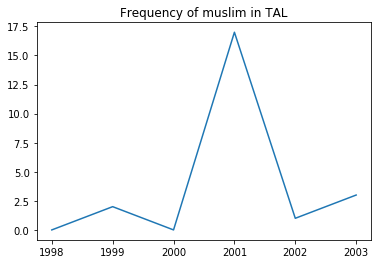

In [18]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'muslim')

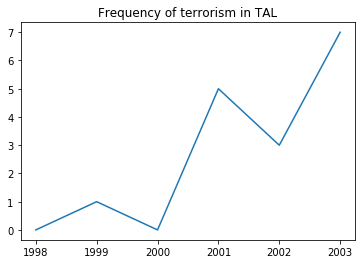

In [41]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'terrorism')

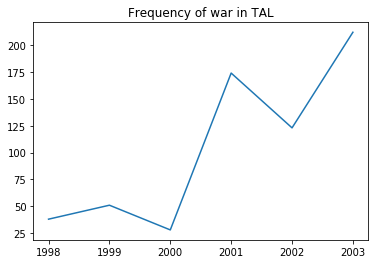

In [20]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'war')

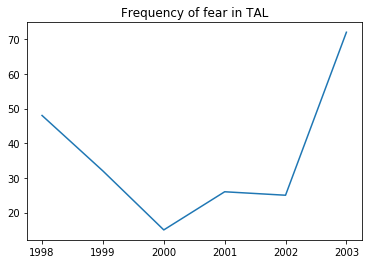

In [27]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'fear')

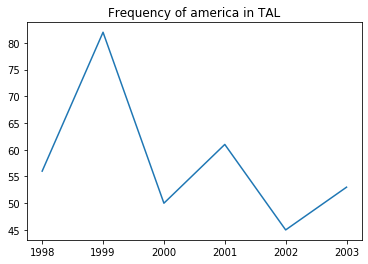

In [21]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'america')

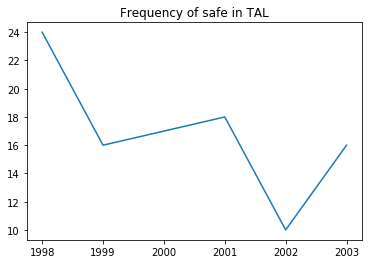

In [22]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'safe')

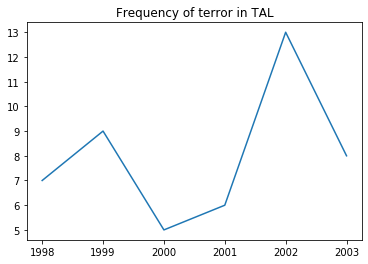

In [23]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'terror')

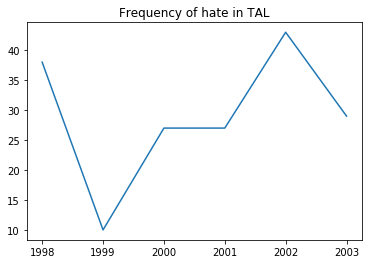

In [30]:
helper.plot_count(tal_df,[1998,1999,2000,2001,2002,2003],'hate')

## Most common adjectives

This requires POS tagging on the corpus which will take time. I would save down the POS tags down to save time later.

In [28]:
# war
word = 'war'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{'civil': 1, 'big': 1, 'anti': 1}
{'civil': 1, 'religious': 1, 'anti': 1}
{'active': 1}
{'civil': 2, 'turf': 1, 'other': 1, 'mock': 1, 'massive': 1, 'coming': 1, 'bloody': 1, 'Israeli': 1, 'American': 1, 'current': 1, 'unpopular': 1, 'holy': 1}
{'overall': 1, 'nuclear': 1, 'successful': 1, 'likely': 1, 'narrow': 1}
{'previous': 1, 'current': 1, 'last': 1, 'different': 1, 'other': 1, 'splendid': 1, 'new': 1, 'possible': 1, 'first': 1, 'bloody': 1, 'preventive': 1, 'anti': 3, 'civil': 1, 'political': 1, 'little': 1, 'holy': 2}


In [31]:
# terror
word = 'terrorism'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{}
{}
{}
{'Anti': 1}
{'global': 1, 'Palestinian': 1}
{'global': 1}


In [29]:
# terror
word = 'terror'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{}
{}
{}
{}
{'immense': 1}
{}


In [25]:
# islam
word = 'islam'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{}
{}
{}
{}
{}
{}


In [26]:
# muslim
word = 'muslim'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{}
{}
{}
{'local': 1, 'great': 1}
{}
{}


In [27]:
# america
word = 'america'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{'young': 1, 'entire': 1, 'normal': 1, 'new': 1}
{'middle': 1, 'white': 1}
{'rural': 2}
{'middle': 1}
{'broad': 1}
{}


In [32]:
# weapon
word = 'weapon'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{'nuclear': 1}
{}
{}
{'secret': 1, 'biological': 1}
{'nuclear': 6, 'terrorist': 1}
{'medieval': 1}


In [36]:
# afghanistan
word = 'family'
print(helper.most_common_adj(df98, word))

print(helper.most_common_adj(df99, word))

print(helper.most_common_adj(df00, word))

print(helper.most_common_adj(df01, word))

print(helper.most_common_adj(df02, word))

print(helper.most_common_adj(df03, word))

{'typical': 1, 'Mexican': 1, 'immediate': 1, 'extended': 3, 'own': 3, 'whole': 3, 'other': 1, 'good': 1, 'frugal': 1, 'many': 1}
{'huge': 1, 'big': 2, 'new': 1, 'whole': 3, 'Longfellow': 1, 'Catholic': 1, 'other': 2, 'Jewish': 1, 'Christian': 2, 'Polish': 1, 'real': 1, 'second': 1, 'black': 2, 'American': 3, 'rich': 1, 'entire': 1, 'military': 1, 'Greek': 1, 'wrong': 1, 'Only': 1, 'traditional': 1, 'own': 1}
{'whole': 5, 'everyday': 2, 'other': 3, 'beautiful': 2, 'inter': 1, 'extended': 1, 'little': 1, 'spiritual': 1, 'funny': 1, 'black': 1, 'normal': 1}
{'poor': 1, 'ideal': 1, 'American': 1, 'old': 3, 'whole': 8, 'little': 2, 'other': 1, 'own': 1, 'big': 1, 'close': 1, 'lifelong': 1, 'large': 1, 'immediate': 1, 'perfect': 1, 'current': 1}
{'basic': 2, 'relevant': 2, 'shocked': 2, 'own': 2, 'big': 2, 'American': 1, 'Italian': 1, 'whole': 5, 'Polish': 1, 'Catholic': 1, 'Jewish': 2, 'reliant': 1, 'Guyanese': 1, 'British': 3, 'other': 1, 'nice': 1}
{'Protestant': 1, 'new': 2, 'own': 1, 'C

## Word networks

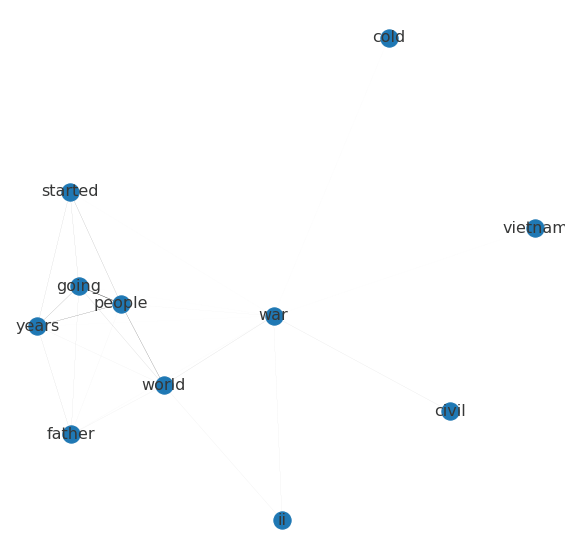

In [25]:
# pre 9/11
# WARNING: If you cut down edges previously, it will stay that way in future uses
helper.graph_nx_word(grouped, 'no_lemma_normalized_sents', 5, 'war')

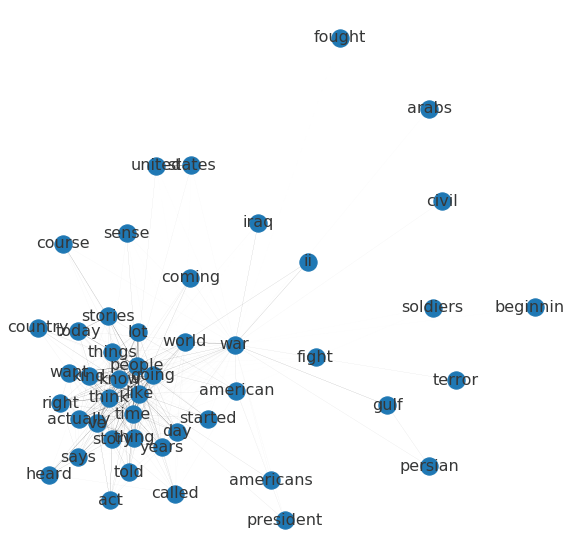

In [23]:
# post 9/11
# pass in graph to save time
helper.graph_nx_word(grouped2, 'no_lemma_normalized_sents', 10, 'war')

/Users/laurenli/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


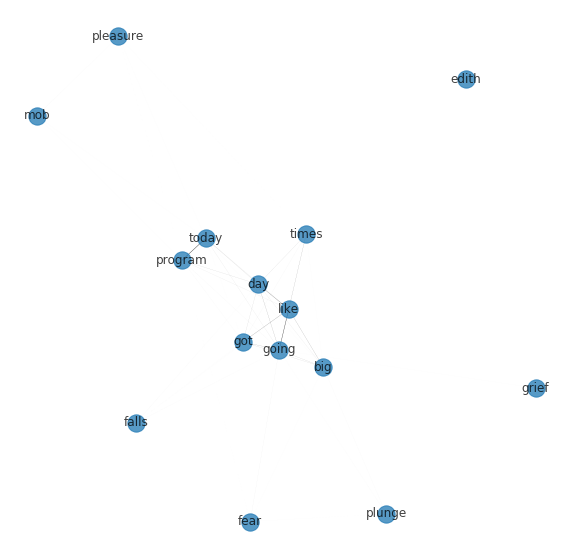

In [39]:
helper.graph_nx_word(grouped, 'no_lemma_normalized_sents', 1, 'terror')

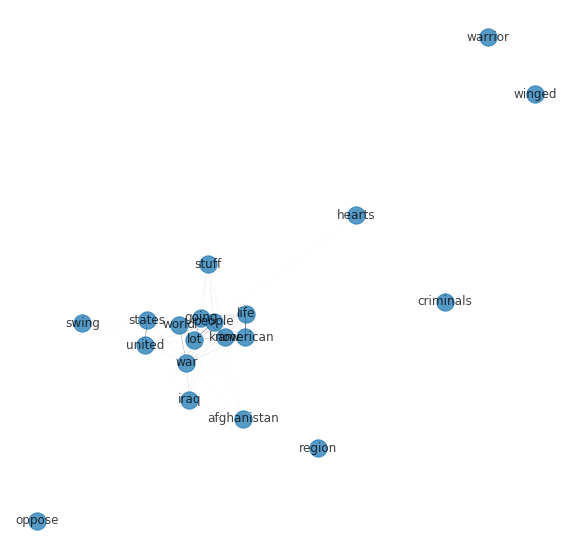

In [47]:
helper.graph_nx_word(grouped2, 'no_lemma_normalized_sents', 1, 'terror')

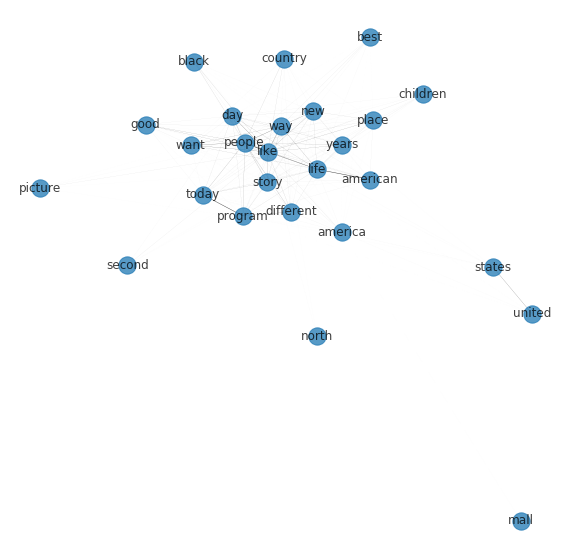

In [52]:
helper.graph_nx_word(grouped, 'no_lemma_normalized_sents', 5, 'america')

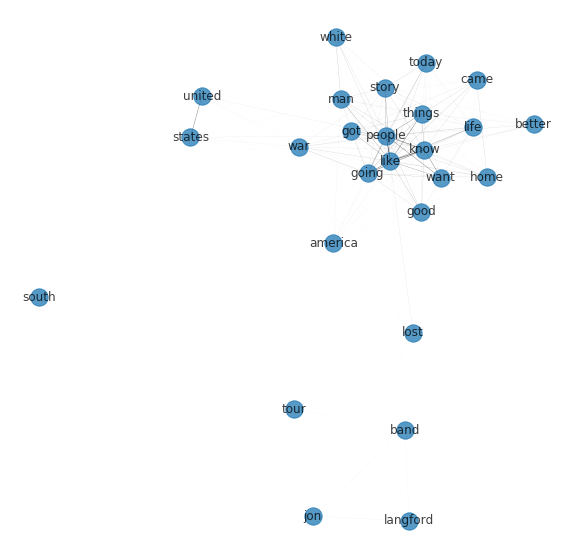

In [53]:
helper.graph_nx_word(grouped2, 'no_lemma_normalized_sents', 5, 'america')

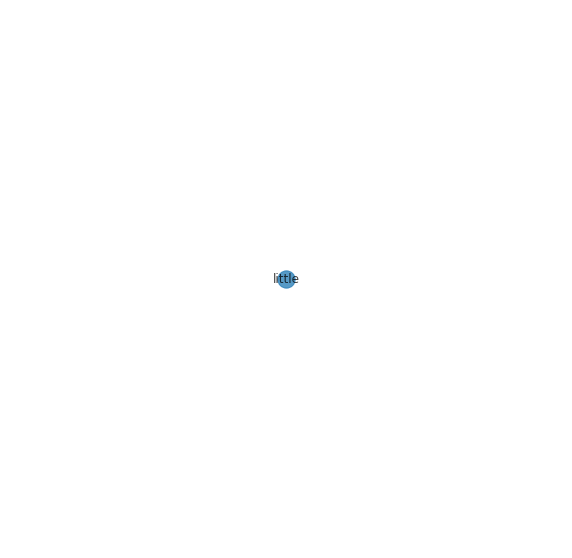

In [59]:
helper.graph_nx_word(grouped, 'no_lemma_normalized_sents', 1, 'weapon')

In [ ]:
helper.graph_nx_word(grouped2, 'no_lemma_normalized_sents', 1, 'weapon')

## Embedding Bias

Bias in the embeddings, between two groups with respect to a neutral word list, is quantified by the relative norm
difference, which is calculated as follows: (a) a representative group vector is created as the average of the vectors for
each word in the given gender/ethnicity group; (b) the average l2 norm of the differences between each representative
group vector and each vector in the neutral word list of interest is calculated; (c) the relative norm difference is the
difference of the average l2 norms. This metric captures the relative distance (and thus relative strength of association)
between the group words and the neutral word list of interest.


Negative bias means more associated with the group being subtracted

From: https://arxiv.org/pdf/1711.08412.pdf

In [74]:
# create representative group 
# male
male = ['he', 'son', 'boys', 'boy', 'male', 'man', 'men', 'his', 'nephew', 'nephews', 'brother', 'brothers',
       'father', 'uncle', 'uncles', 'himself']
# female, from the Garg paper
female = ['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself', 'female', 'females','sister', 'daughters', 'mothers',
          'women', 'girls', 'sisters', 'aunt', 'aunts', 'niece', 'nieces']
# rich
rich = ['rich', 'wealthy', 'wealth', 'expensive', 'affluent', 'affluence', 'afford']
# poor
poor = ['poor', 'cheap', 'poverty', 'broke']

islam = ['muslim','muslims','iraq','iraqi','islam','islamic','arab','arabic','arabs']
christian = ['christian','christians','priest','pastor','presbyterian','presbyterians','christ','jesus']

In [80]:
# pre 911
talW2V = gensim.models.word2vec.Word2Vec(grouped['no_lemma_normalized_sents'].sum(),size=5000)

male_vec = helper.mk_rep_group_vec(talW2V, male)
female_vec = helper.mk_rep_group_vec(talW2V, female)
rich_vec = helper.mk_rep_group_vec(talW2V, rich)
poor_vec = helper.mk_rep_group_vec(talW2V, poor)
islam_vec = helper.mk_rep_group_vec(talW2V,islam)
christ_vec = helper.mk_rep_group_vec(talW2V,christian)

In [81]:
islam_vec

nan

In [71]:
# now try on post 9/11
talW2V01 = gensim.models.word2vec.Word2Vec(grouped2['no_lemma_normalized_sents'].sum(),size=2000)

male_vec01 = helper.mk_rep_group_vec(talW2V01, male)
female_vec01 = helper.mk_rep_group_vec(talW2V01, female)
rich_vec01 = helper.mk_rep_group_vec(talW2V01, rich)
poor_vec01 = helper.mk_rep_group_vec(talW2V01, poor)
islam_vec01 = helper.mk_rep_group_vec(talW2V01,islam)

In [72]:
# neutral word list (war? liberal, conservative)
liberal = ['liberal', 'progressive', 'democrat'] 
conservative = ['conservative','republican', '']
war = ['war', 'soldier', 'soldiers', 'fight', 'battle', 'battles', 'weapon', 'weapons', 'bomb', 'bombs', 'death']
anger = ['angry', 'mad', 'hate', 'anger', 'disgust']
fear = ['scared', 'fear', 'scary', 'afraid']
happy = ['happy', 'excited', 'enjoy', 'enjoying']
sad = ['sad', 'unhappy', 'tears']
violence = ['war','wars','weapon','weapons','violence','violent','attack','battle','fight']

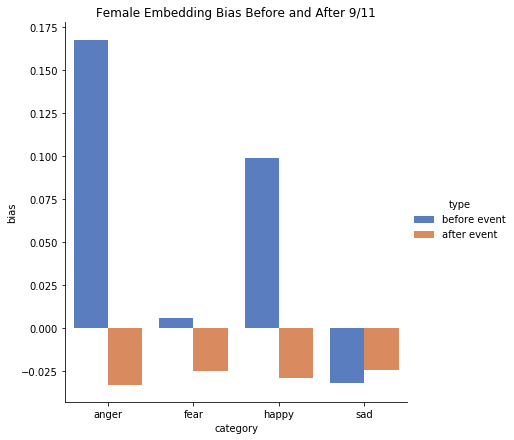

In [85]:
wordlist_dict = {'anger': anger, 'fear': fear, 'happy': happy, 'sad': sad}
pre_dict = {'model': talW2V, 'group_vec': female_vec, 'compare_vec': male_vec}
post_dict = {'model': talW2V01, 'group_vec': female_vec01, 'compare_vec': male_vec01}

helper.plot_bias(pre_dict, post_dict, 'Female Embedding Bias Before and After 9/11',wordlist_dict)

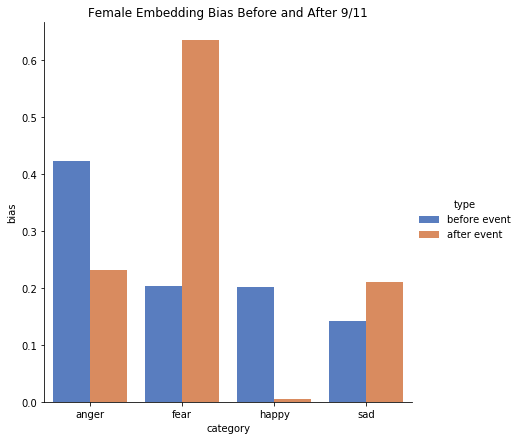

In [84]:
wordlist_dict = {'anger': anger, 'fear': fear, 'happy': happy, 'sad': sad}
pre_dict = {'model': talW2V, 'group_vec': poor_vec, 'compare_vec': rich_vec}
post_dict = {'model': talW2V01, 'group_vec': poor_vec01, 'compare_vec': rich_vec01}

helper.plot_bias(pre_dict, post_dict, 'Female Embedding Bias Before and After 9/11',wordlist_dict)

## Most similar words

2001

In [42]:
word_all = word1+word2

In [44]:
helper.agg_sim_words([talW2V, talW2V01], ['before 911', 'after 911'], word_all)

,iraq,iraqi,iraqis,afghanistan,qaeda,weapon,weapons,muslim,muslims,terrorist,...,security,secure,love,america,american,country,safe,family,home,period
0,NA,NA,NA,NA,NA,"[(sudden, 0.9989239573478699), (taking, 0.9989...",NA,NA,NA,NA,...,"[(committee, 0.9999585151672363), (al, 0.99995...","[(making, 0.9996501207351685), (rich, 0.999614...","[(true, 0.9976155757904053), (world, 0.9967904...","[(jay, 0.9998445510864258), (producers, 0.9998...","[(public, 0.989877462387085), (wbez, 0.9894055...","[(suburban, 0.9998255968093872), (police, 0.99...","[(bored, 0.999897837638855), (confused, 0.9998...","[(found, 0.9995360970497131), (small, 0.999501...","[(expense, 0.9985451698303223), (friends, 0.99...",before 911
1,"[(majority, 0.9999509453773499), (ideas, 0.999...","[(democrats, 0.9999638795852661), (papers, 0.9...","[(share, 0.999951183795929), (character, 0.999...","[(sports, 0.9999758005142212), (wear, 0.999972...","[(beat, 0.9999322295188904), (mary, 0.99993199...","[(connection, 0.9999487400054932), (drop, 0.99...","[(sex, 0.9999672174453735), (food, 0.999966204...","[(example, 0.9999345541000366), (political, 0....","[(date, 0.9999000430107117), (laugh, 0.9998935...","[(security, 0.999968409538269), (attacks, 0.99...",...,"[(clinton, 0.999980092048645), (authority, 0.9...","[(strange, 0.9998478889465332), (matter, 0.999...","[(ask, 0.9995733499526978), (talk, 0.999414443...","[(border, 0.999963641166687), (political, 0.99...","[(public, 0.9942607879638672), (liberacion, 0....","[(classifieds, 0.9998220205307007), (seattle, ...","[(losing, 0.9999561309814453), (legs, 0.999953...","[(moved, 0.9997044801712036), (took, 0.9995684...","[(house, 0.9995330572128296), (night, 0.999291...",after 911


## Plotting dimensions as in hw7

In [45]:
# dimensions
Gender = helper.dimension(talW2V, ['man','guy', 'male'], ['woman', 'girl', 'female'])
Race = helper.dimension(talW2V, ['black','blacks', 'brown', ], ['white', 'whites', 'white', 'white'])
Class = helper.dimension(talW2V, ['rich', 'expensive', 'wealthy'], ['poor', 'cheap', 'poor'])

Morality = helper.dimension(talW2V, ['good', 'good', 'honest','pure'], 
                     ['bad', 'evil','lie','dirty'])

Education = helper.dimension(talW2V, ['educated','smart'], 
                      ['dumb','stupid'])
dim_dict = {'gender': Gender, 'race': Race, 'class': Class, 'morality':Morality, 'education':Education}

In [46]:
# word lists
emotions = ['happy', 'sad', 'excited','fear', 'lonely', 'ashamed', 'shame', 
            'embarrassed', 'hate', 'love', 'anger', 'upset', 'tired', 'lazy', 'dread', 'hope']

opinions = ['believe', 'belief', 'perspective', 'opinion', 'thought', 'think', 'attitude']

self=['self', 'appearance', 'looks', 'confidence', 'perception', 'gay', 
      'lesbian', 'black', 'white', 'american', 'exotic']

rel=['single', 'divorce', 'divorced', 'family', 'brother', 'sister', 'children', 'aunt', 'uncle',
     'child', 'wedding', 'married', 'marriage', 'boyfriend', 'girlfriend', 'partner', 'love']



In [47]:
# make dataframe with emotions and dimensions for pre 9/11
Emodf = helper.makeDF(talW2V, emotions, dim_dict)
Opdf = helper.makeDF(talW2V, opinions, dim_dict)
Selfdf = helper.makeDF(talW2V, self, dim_dict)
Reldf = helper.makeDF(talW2V, rel, dim_dict)

Emotions


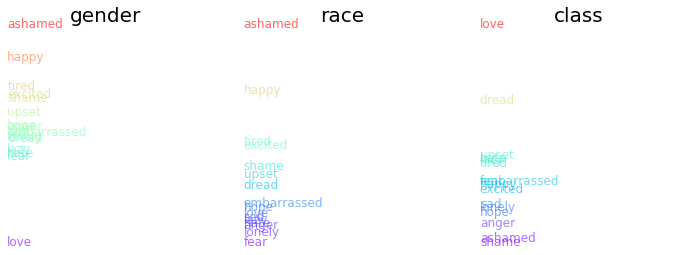

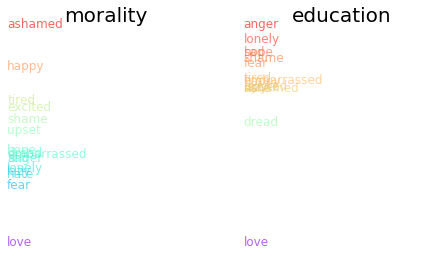

In [48]:
# display words on dimensions
print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
helper.PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'education')
plt.show()

In [49]:
## now will look at 2001-2003

# dimensions
Gender01 = helper.dimension(talW2V01, ['man','guy', 'male','brother','father', 'son'], 
                            ['woman', 'girl', 'female','sister', 'mother','daughter'])
Race01 = helper.dimension(talW2V01, ['black','blacks', 'brown', ], ['white', 'whites', 'white', 'white'])
Class01 = helper.dimension(talW2V01, ['rich', 'expensive', 'wealthy'], ['poor', 'cheap', 'poor'])

Morality01 = helper.dimension(talW2V01, ['good', 'good', 'honest','pure'], 
                     ['bad', 'evil','lie','dirty'])

Education01 = helper.dimension(talW2V01, ['educated','smart'], 
                      ['dumb','stupid'])
dim_dict01 = {'gender': Gender01, 'race': Race01, 'class': Class01, 'morality':Morality01, 'education':Education01}

Emotions


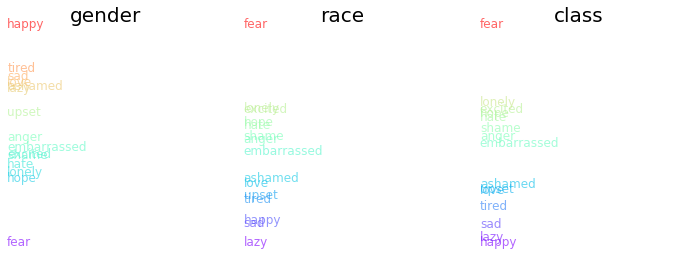

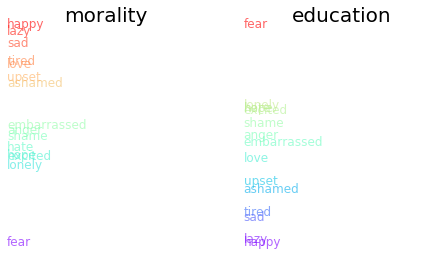

In [50]:
# now will 2001-2003
emotions = ['happy', 'sad', 'excited','fear', 'lonely', 'ashamed', 'shame', 
            'embarrassed', 'hate', 'love', 'anger', 'upset', 'tired', 'lazy', 'hope']
Emodf = helper.makeDF(talW2V01, emotions, dim_dict01)
Opdf = helper.makeDF(talW2V01, opinions, dim_dict01)
Selfdf = helper.makeDF(talW2V01, self, dim_dict01)
Reldf = helper.makeDF(talW2V01, rel, dim_dict01)


print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
helper.PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'education')
plt.show()